In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
# Part a) Random sample of 25 observations
np.random.seed(123)  # Set seed for reproducibility
sample = data.sample(n=25)
sample_glucose_mean = sample['Glucose'].mean()
sample_glucose_max = sample['Glucose'].max()

In [4]:
population_glucose_mean = data['Glucose'].mean()
population_glucose_max = data['Glucose'].max()

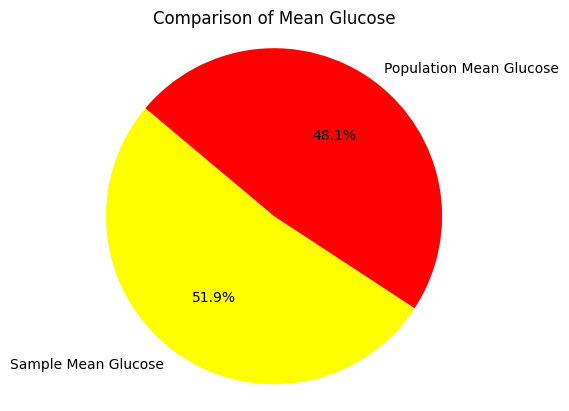

In [18]:
# Create comparison pie chart for mean glucose
labels = ['Sample Mean Glucose', 'Population Mean Glucose']
sizes = [sample_glucose_mean, population_glucose_mean]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['yellow', 'red'])
plt.title('Comparison of Mean Glucose')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

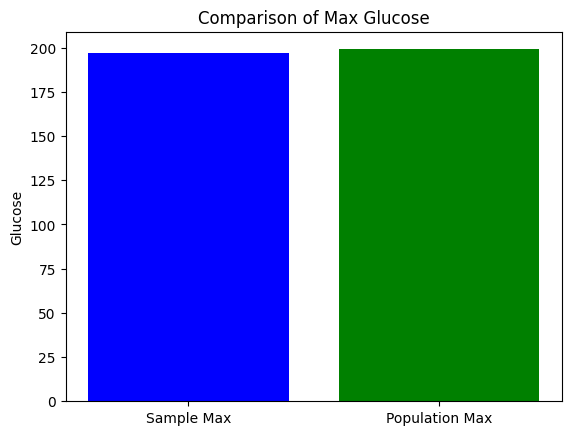

In [6]:
plt.bar(['Sample Max', 'Population Max'], [sample_glucose_max, population_glucose_max], color=['blue', 'green'])
plt.title('Comparison of Max Glucose')
plt.ylabel('Glucose')
plt.show()

In [7]:
# Part b) 98th percentile of BMI
sample_bmi_98th = np.percentile(sample['BMI'], 98)
population_bmi_98th = np.percentile(data['BMI'], 98)

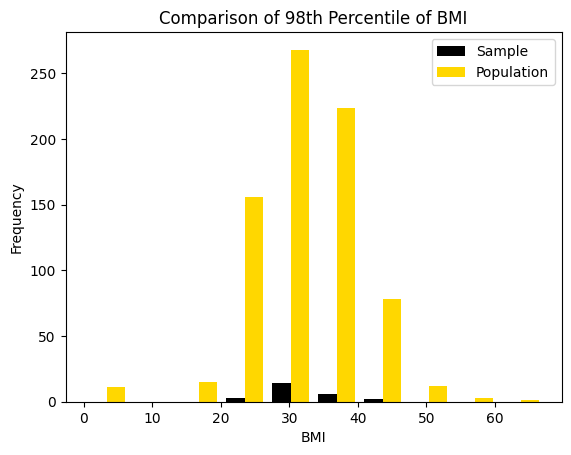

In [19]:
# Create comparison histogram for 98th percentile of BMI
plt.hist([sample['BMI'], data['BMI']], bins=10, label=['Sample', 'Population'], color=['black', 'gold'])
plt.title('Comparison of 98th Percentile of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [22]:
# Part c) Bootstrap
bootstrap_samples = []
for _ in range(500):
    bootstrap_sample = data.sample(n=150, replace=True)
    bootstrap_samples.append(bootstrap_sample)

bootstrap_mean = np.mean([sample['BloodPressure'].mean() for sample in bootstrap_samples])
bootstrap_std = np.mean([sample['BloodPressure'].std() for sample in bootstrap_samples])
bootstrap_95th_percentile = np.percentile([sample['BloodPressure'].quantile(0.95) for sample in bootstrap_samples], 95)

population_mean = data['BloodPressure'].mean()
population_std = data['BloodPressure'].std()
population_95th_percentile = np.percentile(data['BloodPressure'].quantile(0.95), 95)

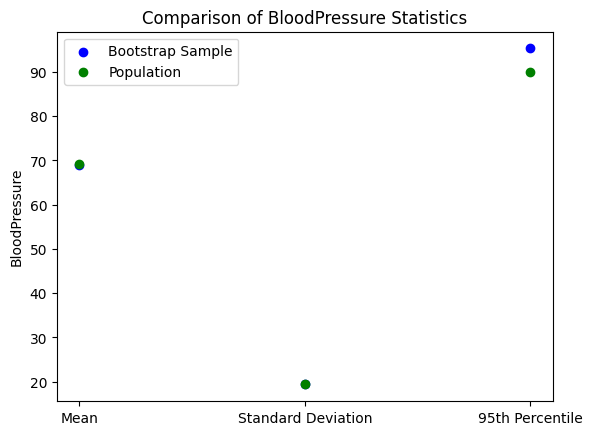

In [24]:
# Create comparison scatter plot for mean, std, and 95th percentile of BloodPressure
labels = ['Mean', 'Standard Deviation', '95th Percentile']
sample_stats = [bootstrap_mean, bootstrap_std, bootstrap_95th_percentile]
population_stats = [population_mean, population_std, population_95th_percentile]

fig, ax = plt.subplots()

ax.scatter(labels, sample_stats, label='Bootstrap Sample', color='blue')
ax.scatter(labels, population_stats, label='Population', color='green')

ax.set_ylabel('BloodPressure')
ax.set_title('Comparison of BloodPressure Statistics')
ax.legend()

plt.show()